In [3]:
pip install matplotlib seaborn


CSV file loaded successfully.

Displaying the first 5 rows of the DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.

<ipython-input-4-d70835ddcc9f>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
<ipython-input-4-d70835ddcc9f>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


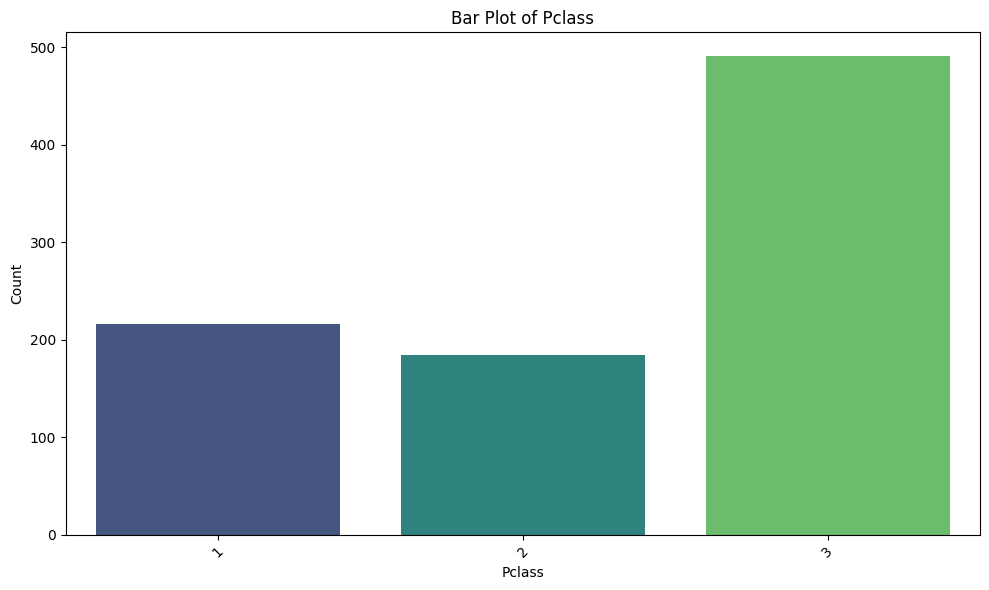

<ipython-input-4-d70835ddcc9f>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


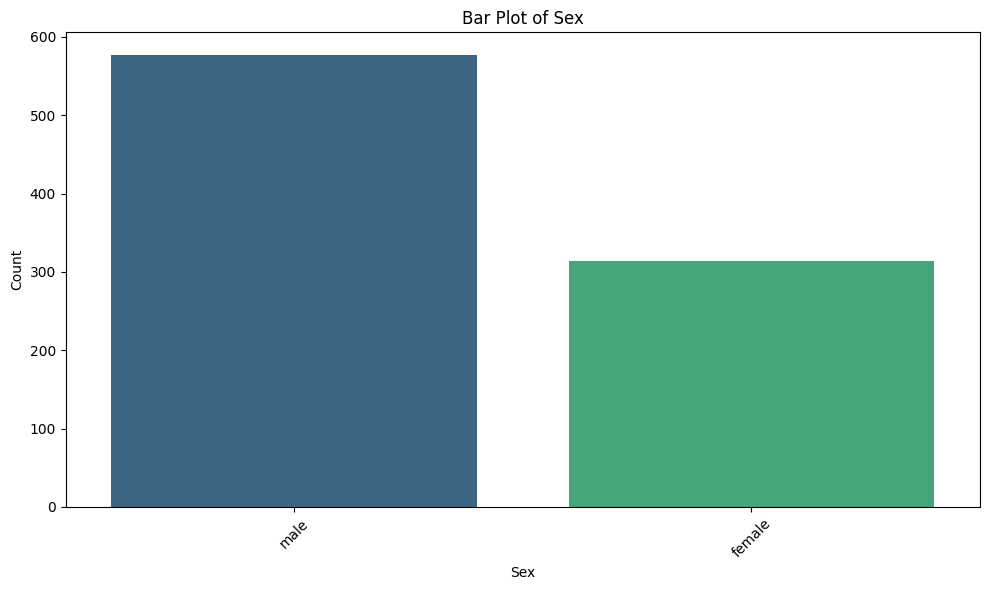

<ipython-input-4-d70835ddcc9f>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


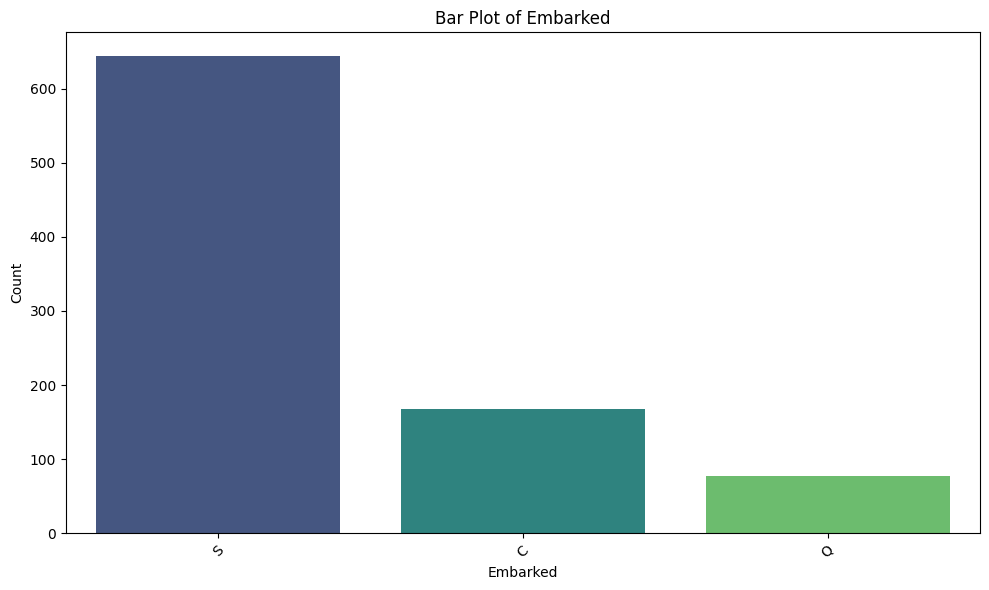

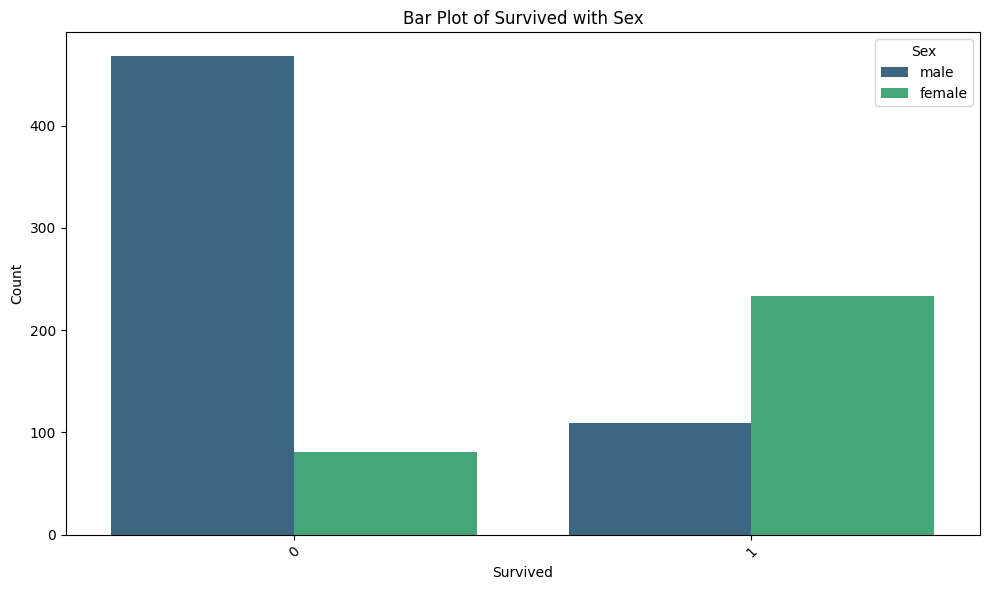

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load CSV file into a DataFrame
def load_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        print("CSV file loaded successfully.\n")
        return df
    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None

# Function to display the first few rows of the DataFrame
def display_head(df, n=5):
    print(f"Displaying the first {n} rows of the DataFrame:")
    print(df.head(n))
    print("\n")

# Function to filter data based on a condition
def filter_data(df, column, condition):
    try:
        filtered_df = df.query(f"{column} {condition}")
        print(f"Data filtered with condition ({column} {condition}):")
        print(filtered_df.head())
        print("\n")
        return filtered_df
    except Exception as e:
        print(f"Error in filtering data: {e}")
        return df

# Function to handle missing values by filling with the mean of each column
def handle_missing_values(df):
    numeric_columns = df.select_dtypes(include='number').columns
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
    print("Missing values handled by filling with mean for numeric columns:")
    print(df.head())
    print("\n")
    return df

# Function to calculate and display summary statistics
def calculate_summary_statistics(df):
    summary_stats = df.describe()
    print("Summary Statistics:")
    print(summary_stats)
    print("\n")
    return summary_stats

# Function to create a bar plot for a specific column
def plot_bar(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, palette='viridis')
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Function to create a bar plot for a specific column with hue
def plot_bar_with_hue(df, column, hue):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, hue=hue, palette='viridis')
    plt.title(f'Bar Plot of {column} with {hue}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Main function to run all steps
def main():
    # Path to the CSV file
    file_path = '/content/Titanic-Dataset.csv'  # Replace with your CSV file path

    # Step 1: Load the CSV file
    df = load_csv(file_path)
    if df is None:
        return

    # Step 2: Display the first few rows of the DataFrame
    display_head(df)

    # Step 3: Filter data based on a condition (example: column 'Age' > 30)
    if 'Age' in df.columns:
        df_filtered = filter_data(df, 'Age', '> 30')
    else:
        print("Column 'Age' not found in the DataFrame. Skipping filtering step.\n")
        df_filtered = df

    # Step 4: Handle missing values
    df_filled = handle_missing_values(df_filtered)

    # Step 5: Calculate and display summary statistics
    calculate_summary_statistics(df_filled)

    # Step 6: Plot bar plots for specific columns
    if 'Pclass' in df.columns:
        plot_bar(df, 'Pclass')
    if 'Sex' in df.columns:
        plot_bar(df, 'Sex')
    if 'Embarked' in df.columns:
        plot_bar(df, 'Embarked')
    if 'Survived' in df.columns and 'Sex' in df.columns:
        plot_bar_with_hue(df, 'Survived', 'Sex')

if __name__ == "__main__":
    main()
